In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# covid = pd.read_excel('src/covid.xlsx')

covid = pd.read_csv('src/covid.csv')

In [3]:
covid.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
covid.columns

Index(['Unnamed: 0', 'iso_code', 'continent', 'location', 'date',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccin

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             85171 non-null  int64  
 1   iso_code                               85171 non-null  object 
 2   continent                              81060 non-null  object 
 3   location                               85171 non-null  object 
 4   date                                   85171 non-null  object 
 5   total_cases                            83072 non-null  float64
 6   new_cases                              83070 non-null  float64
 7   new_cases_smoothed                     82069 non-null  float64
 8   total_deaths                           73408 non-null  float64
 9   new_deaths                             73566 non-null  float64
 10  new_deaths_smoothed                    82069 non-null  float64
 11  to

In [6]:
df = covid[['continent', 'location', 'date', 'total_cases', 'new_cases',
    'total_deaths', 'new_deaths', 'total_tests', 'new_tests', 'total_vaccinations', 'new_vaccinations',
    'population']]

df

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,total_vaccinations,new_vaccinations,population
0,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
1,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
2,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
3,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
4,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85166,Africa,Zimbabwe,2021-04-26,38102.0,16.0,1560.0,3.0,484446.0,1495.0,411610.0,21592.0,14862927.0
85167,Africa,Zimbabwe,2021-04-27,38164.0,62.0,1565.0,5.0,486801.0,2355.0,433939.0,22329.0,14862927.0
85168,Africa,Zimbabwe,2021-04-28,38191.0,27.0,1565.0,0.0,488826.0,2025.0,458013.0,24074.0,14862927.0
85169,Africa,Zimbabwe,2021-04-29,38235.0,44.0,1567.0,2.0,NaN,NaN,477597.0,19584.0,14862927.0


In [7]:
# df.dropna(subset=['new_deaths'])

df.fillna(0, inplace=True)

C:\Users\muhih\AppData\Local\Temp\ipykernel_2172\3585213028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [8]:
global_df = df[df['continent'] == 0]
global_df.drop(columns={'continent'}, inplace=True)
global_df = global_df[~global_df['location'].isin(['European Union', 'International', 'World'])]

global_df

C:\Users\muhih\AppData\Local\Temp\ipykernel_2172\52087469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_df.drop(columns={'continent'}, inplace=True)


,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,total_vaccinations,new_vaccinations,population
432,Africa,2020-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.340598e+09
433,Africa,2020-02-14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.340598e+09
434,Africa,2020-02-15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.340598e+09
435,Africa,2020-02-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.340598e+09
436,Africa,2020-02-17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.340598e+09
...,...,...,...,...,...,...,...,...,...,...,...
71187,South America,2021-04-26,24325791.0,81311.0,653917.0,2789.0,0.0,0.0,70071914.0,1360561.0,4.307598e+08
71188,South America,2021-04-27,24453775.0,127984.0,658283.0,4366.0,0.0,0.0,71927081.0,1855167.0,4.307598e+08
71189,South America,2021-04-28,24607245.0,153470.0,663348.0,5065.0,0.0,0.0,73351706.0,1424625.0,4.307598e+08
71190,South America,2021-04-29,24736782.0,129537.0,667863.0,4515.0,0.0,0.0,74824700.0,1472994.0,4.307598e+08


In [9]:
# Removing Continent Columns

df = df[~(df['continent'] == 0)]

([], [])

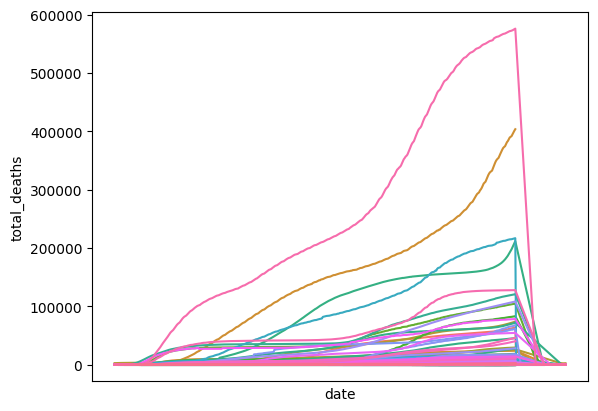

In [10]:
sns.lineplot(data=df, x='date', y='total_deaths', hue='location', legend=False)

plt.xticks([])

([], [])

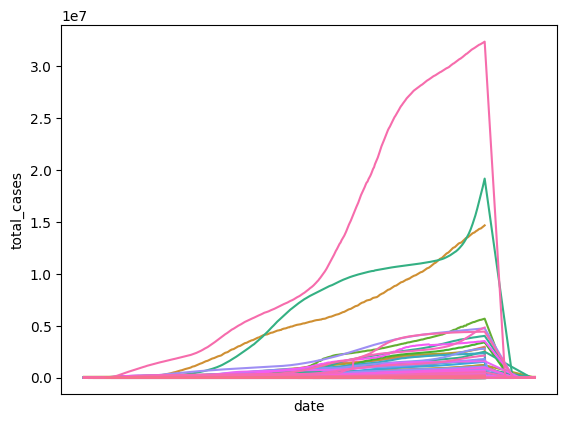

In [11]:
sns.lineplot(data=df, x='date', y='total_cases', hue='location', legend=False)

plt.xticks([])

([], [])

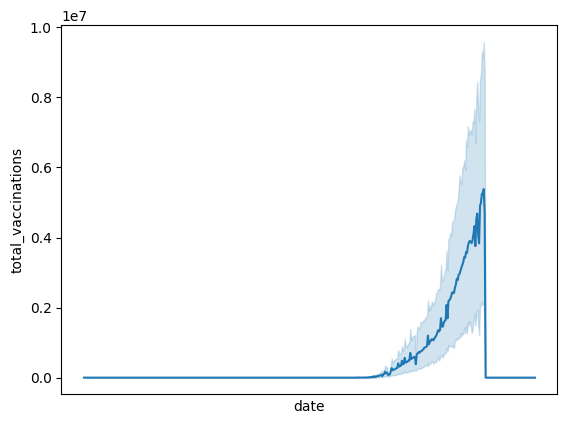

In [16]:
sns.lineplot(data=df, x='date', y='total_vaccinations', legend=False)

plt.xticks([])

In [13]:
peak_death = df.groupby('location')['total_deaths'].idxmax()



In [14]:
df.loc[peak_death]

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,total_vaccinations,new_vaccinations,population
431,Asia,Afghanistan,2021-04-30,59745.0,169.0,2625.0,7.0,0.0,0.0,0.0,0.0,38928341.0
1305,Europe,Albania,2021-04-30,131085.0,108.0,2394.0,5.0,0.0,0.0,476903.0,23655.0,2877800.0
1736,Africa,Algeria,2021-04-30,122108.0,242.0,3253.0,9.0,0.0,0.0,0.0,0.0,43851043.0
2159,Europe,Andorra,2021-04-28,13148.0,27.0,125.0,1.0,0.0,0.0,0.0,0.0,77265.0
2568,Africa,Angola,2021-04-30,26652.0,221.0,596.0,2.0,0.0,0.0,0.0,0.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...
83039,South America,Venezuela,2021-04-30,197683.0,1297.0,2136.0,19.0,0.0,0.0,0.0,0.0,28435943.0
83264,Asia,Vietnam,2020-09-03,1046.0,0.0,35.0,1.0,0.0,0.0,0.0,0.0,97338583.0
84354,Asia,Yemen,2021-04-30,6317.0,23.0,1226.0,4.0,0.0,0.0,0.0,0.0,29825968.0
84763,Africa,Zambia,2021-04-30,91586.0,53.0,1251.0,1.0,0.0,0.0,0.0,0.0,18383956.0


In [15]:
df = df[df['date'] < cut_off]

NameError: name 'cut_off' is not defined